In [97]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
mouse_data_df = pd.read_csv(mouse_drug_data_to_load)
clinical_data_df = pd.read_csv(clinical_trial_data_to_load)


# Combine the data into a single dataset
combined_data_df = pd.merge(clinical_data_df, mouse_data_df,
                                 how='outer', on='Mouse ID')

# Display the data table for preview
combined_data_df.head(10)


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.000000,0,Capomulin
1,b128,5,45.651331,0,Capomulin
2,b128,10,43.270852,0,Capomulin
3,b128,15,43.784893,0,Capomulin
4,b128,20,42.731552,0,Capomulin
5,b128,25,43.262145,1,Capomulin
6,b128,30,40.605335,1,Capomulin
7,b128,35,37.967644,1,Capomulin
8,b128,40,38.379726,2,Capomulin
9,b128,45,38.982878,2,Capomulin


## Tumor Response to Treatment

In [98]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
Tumor_Data_groups = combined_data_df.groupby(['Drug','Timepoint'])

# Convert to DataFrame
Tumor_Data_Mean_df = Tumor_Data_groups['Tumor Volume (mm3)'].mean()
Tumor_Data_Mean_df = Tumor_Data_Mean_df.reset_index()
                                              
# Preview DataFrame
Tumor_Data_Mean_df.head()                                         

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325


In [99]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
Tumor_Data_SError_df = Tumor_Data_groups['Tumor Volume (mm3)'].sem()

# Convert to DataFrame
Tumor_Data_SError_df = Tumor_Data_SError_df.reset_index()
                                             
# Preview DataFrame
Tumor_Data_SError_df.head()


,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731


In [100]:
# Minor Data Munging to Re-Format the Data Frames
# table = pd.pivot_table(df, values='D', index=['A', 'B'],
#                    columns=['C'], aggfunc=np.sum, fill_value=0)

Table_Tumor_Data_df = pd.pivot_table(Tumor_Data_Mean_df, values='Tumor Volume (mm3)', index=['Timepoint'],
                   columns=['Drug'])
                      
    
# Preview that Reformatting worked
Table_Tumor_Data_df.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334


In [101]:
Tumor_Data_SError_pivot_df = pd.pivot_table(Tumor_Data_SError_df, values='Tumor Volume (mm3)', index=['Timepoint'],
                   columns=['Drug'])
Tumor_Data_SError_pivot_df.reset_index()

Tumor_Data_SError_pivot_df.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.448593,0.164505,0.235102,0.264819,0.202385,0.218091,0.231708,0.482955,0.239862,0.188950
10,0.702684,0.236144,0.282346,0.357421,0.319415,0.402064,0.376195,0.720225,0.433678,0.263949
15,0.838617,0.332053,0.357705,0.580268,0.444378,0.614461,0.466109,0.770432,0.493261,0.370544
20,0.909731,0.359482,0.476210,0.726484,0.595260,0.839609,0.555181,0.786199,0.621889,0.533182


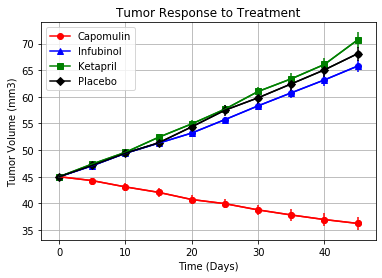

In [102]:
# Generate the Plot (with Error Bars)

#'Capomulin','Infubinol','Ketapril','Placebo'
#Table_Tumor_Data_FourDrugs_df.plot(label="Tumor Resonse to Treatment")

plt.scatter(Table_Tumor_Data_df.index, Table_Tumor_Data_df["Capomulin"], color="red")
plt.plot(Table_Tumor_Data_df.index, Table_Tumor_Data_df["Capomulin"], color="red", marker="o", label="Capomulin")
plt.errorbar(Table_Tumor_Data_df.index, Table_Tumor_Data_df["Capomulin"], 
            yerr=Tumor_Data_SError_pivot_df["Capomulin"],  color="r")

plt.scatter(Table_Tumor_Data_df.index, Table_Tumor_Data_df["Infubinol"], color="blue")
plt.plot(Table_Tumor_Data_df.index, Table_Tumor_Data_df["Infubinol"], color="blue", marker="^", label="Infubinol")
plt.errorbar(Table_Tumor_Data_df.index, Table_Tumor_Data_df["Infubinol"], 
            yerr=Tumor_Data_SError_pivot_df["Infubinol"],  color="blue")

plt.scatter(Table_Tumor_Data_df.index, Table_Tumor_Data_df["Ketapril"], color="green")
plt.plot(Table_Tumor_Data_df.index, Table_Tumor_Data_df["Ketapril"], color="g", marker="s", label="Ketapril")
plt.errorbar(Table_Tumor_Data_df.index, Table_Tumor_Data_df["Ketapril"], 
            yerr=Tumor_Data_SError_pivot_df["Ketapril"],  color="green")


plt.scatter(Table_Tumor_Data_df.index, Table_Tumor_Data_df["Placebo"], color="black")
plt.plot(Table_Tumor_Data_df.index, Table_Tumor_Data_df["Placebo"], color="black", marker="D", label="Placebo")
plt.errorbar(Table_Tumor_Data_df.index, Table_Tumor_Data_df["Placebo"], 
            yerr=Tumor_Data_SError_pivot_df["Placebo"],  color="black")


plt.ylabel("Tumor Volume (mm3)")
plt.xlabel("Time (Days)")
plt.title("Tumor Response to Treatment")
plt.grid()
# Create a legend for our chart
plt.legend()

# Save the Figure
plt.savefig("../TumorResponse.png")

# Show the chart
plt.show()


## Metastatic Response to Treatment

In [103]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
Met_Data_groups = combined_data_df.groupby(['Drug','Timepoint'])

# Convert to DataFrame
Met_Data_Mean_df = Met_Data_groups['Metastatic Sites'].mean()
Met_Data_Mean_df = Met_Data_Mean_df.reset_index()

# Preview DataFrame
Met_Data_Mean_df.head(10)

,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.160000
2,Capomulin,10,0.320000
3,Capomulin,15,0.375000
4,Capomulin,20,0.652174
5,Capomulin,25,0.818182
6,Capomulin,30,1.090909
7,Capomulin,35,1.181818
8,Capomulin,40,1.380952
9,Capomulin,45,1.476190


In [104]:
# Store the Standard Error asspcoated with Met. Site Grouped by Drug and Timepoint 
Met_Data_SError_df = Met_Data_groups['Metastatic Sites'].sem()

# Convert to DataFrame
Met_Data_SError_df = Met_Data_SError_df.reset_index()
                                             
# Preview DataFrame
Met_Data_SError_df.head()

,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.074833
2,Capomulin,10,0.125433
3,Capomulin,15,0.132048
4,Capomulin,20,0.161621


In [105]:
# Minor Data Munging to Re-Format the Data Frames

Table_Mat_Data_SE_df = pd.pivot_table(Met_Data_SError_df, values='Metastatic Sites', index=['Timepoint'], columns=['Drug'])
                      
# Preview that Reformatting worked
Table_Mat_Data_SE_df.head()


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.074833,0.108588,0.091652,0.098100,0.093618,0.100947,0.095219,0.066332,0.087178,0.077709
10,0.125433,0.152177,0.159364,0.142018,0.163577,0.115261,0.105690,0.090289,0.123672,0.109109
15,0.132048,0.180625,0.194015,0.191381,0.158651,0.190221,0.136377,0.115261,0.153439,0.111677
20,0.161621,0.241034,0.234801,0.236680,0.181731,0.234064,0.171499,0.119430,0.200905,0.166378


In [106]:
# Minor Data Munging to Re-Format the Data Frames
Table_Mat_Data_df = pd.pivot_table(Met_Data_Mean_df, values='Metastatic Sites', index=['Timepoint'], columns=['Drug'])
                      
# Preview that Reformatting worked
Table_Mat_Data_df.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118


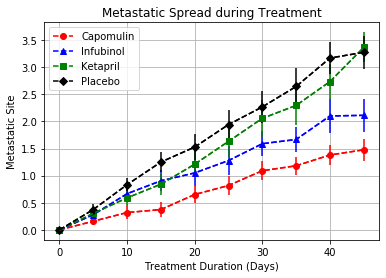

In [107]:
# Generate the Plot (with Error Bars)
plt.plot(Table_Mat_Data_df.index, Table_Mat_Data_df["Capomulin"], color="red", marker="o", linestyle="--", label="Capomulin")
plt.errorbar(Table_Mat_Data_df.index, Table_Mat_Data_df["Capomulin"], 
            yerr=Table_Mat_Data_SE_df["Capomulin"],  color="r", linestyle="--")

plt.plot(Table_Mat_Data_df.index, Table_Mat_Data_df["Infubinol"], color="blue", marker="^", linestyle="--", label="Infubinol")
plt.errorbar(Table_Mat_Data_df.index, Table_Mat_Data_df["Infubinol"], 
            yerr=Table_Mat_Data_SE_df["Infubinol"],  color="blue", linestyle="--")

plt.plot(Table_Mat_Data_df.index, Table_Mat_Data_df["Ketapril"], color="g", marker="s", linestyle="--", label="Ketapril")
plt.errorbar(Table_Mat_Data_df.index, Table_Mat_Data_df["Ketapril"], 
            yerr=Table_Mat_Data_SE_df["Ketapril"],  color="green", linestyle="--")


plt.plot(Table_Mat_Data_df.index, Table_Mat_Data_df["Placebo"], color="black", marker="D", linestyle="--", label="Placebo")
plt.errorbar(Table_Mat_Data_df.index, Table_Mat_Data_df["Placebo"], 
            yerr=Table_Mat_Data_SE_df["Placebo"],  color="black", linestyle="--")

# Create a legend for our chart
plt.ylabel("Metastatic Site")
plt.xlabel("Treatment Duration (Days)")
plt.title("Metastatic Spread during Treatment")
plt.grid()
plt.legend()

# Save the Figure
plt.savefig("../MetastaticResponse.png")

# Show the chart
plt.show()



## Survival Rates

In [108]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
Survival_Rate_groups = combined_data_df.groupby(['Drug','Timepoint'])

# Convert to DataFrame
Survival_Rate_count_df = Survival_Rate_groups['Tumor Volume (mm3)'].count()
Survival_Rate_count_df = Survival_Rate_count_df.reset_index()
Survival_Rate_count_df = Survival_Rate_count_df.rename(columns = {'Tumor Volume (mm3)': 'Mouse Count'})
                                              
# Preview DataFrame
Survival_Rate_count_df.head()


,Drug,Timepoint,Mouse Count
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


In [109]:
# Minor Data Munging to Re-Format the Data Frames
Mice_Data_Count_pivot_df = pd.pivot_table(Survival_Rate_count_df, values='Mouse Count', index=['Timepoint'],columns=['Drug'])
                      
# Preview that Reformatting worked
Mice_Data_Count_pivot_df.reset_index()
Mice_Data_Count_pivot_df.head()


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17


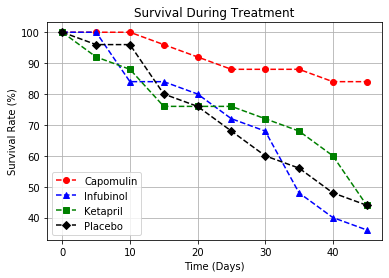

In [110]:
# Generate the Plot (Accounting for percentages)

plt.plot(Mice_Data_Count_pivot_df.index, Mice_Data_Count_pivot_df["Capomulin"]*100/Mice_Data_Count_pivot_df["Capomulin"][0], color="red", marker="o", linestyle="--", label="Capomulin")

plt.plot(Mice_Data_Count_pivot_df.index, Mice_Data_Count_pivot_df["Infubinol"]*100/Mice_Data_Count_pivot_df["Infubinol"][0], color="blue", marker="^", linestyle="--", label="Infubinol")

plt.plot(Mice_Data_Count_pivot_df.index, Mice_Data_Count_pivot_df["Ketapril"]*100/Mice_Data_Count_pivot_df["Ketapril"][0], color="g", marker="s", linestyle="--", label="Ketapril")

plt.plot(Mice_Data_Count_pivot_df.index, Mice_Data_Count_pivot_df["Placebo"]*100/Mice_Data_Count_pivot_df["Placebo"][0], color="black", marker="D", linestyle="--", label="Placebo")

# Create a legend for our chart
plt.ylabel("Survival Rate (%)")
plt.xlabel("Time (Days)")
plt.title("Survival During Treatment")
plt.grid()
plt.legend()

# Save the Figure
plt.savefig("../MouseCountResponse.png")

# Show the Figure
plt.show()

## Summary Bar Graph

In [111]:
# Calculate the percent changes for each drug
# Convert to DataFrame

combined_data_df2 = pd.pivot_table(combined_data_df, values='Tumor Volume (mm3)', index=['Mouse ID', "Drug"],
                   columns=['Timepoint'])
combined_data_df2.reset_index()
combined_data_df2.dtypes
combined_data_df2 = combined_data_df2.fillna(0)
                                   
combined_data_df2.head(5)

combined_data_df3 = combined_data_df2[combined_data_df2[45] > 0]
combined_data_df3.head()

cdf_3 = combined_data_df3.groupby(['Drug'])

Sum_0_df = cdf_3[0].sum()
Sum_45_df = cdf_3[45].sum()
percent_df = pd.DataFrame((Sum_45_df - Sum_0_df) * 100/Sum_0_df)

# Preview DataFrame
print(percent_df.head(10))
  

                   0
Drug                
Capomulin -19.475303
Ceftamin   42.516492
Infubinol  46.123472
Ketapril   57.028795
Naftisol   53.923347
Placebo    51.297960
Propriva   47.241175
Ramicane  -22.320900
Stelasyn   52.085134
Zoniferol  46.579751


<class 'pandas.core.frame.DataFrame'>


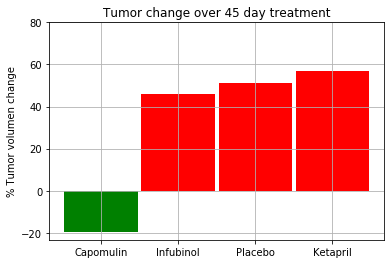

In [112]:
# Store all Relevant Percent Changes into a Tuple
print(type(percent_df))
tup1 = tuple(percent_df.items())
#print(tup1)

# Splice the data between passing and failing drugs

percent_df = percent_df.sort_values(by=[0])
#print(per_df)

filterList = ['Capomulin', 'Infubinol', 'Ketapril', 'Placebo']
percent_df = percent_df[percent_df.index.isin(filterList) ]

# Use functions to label the percentages of changes

colors = []
for value in percent_df[0]:
    if value >= 0 :
        colors.append('r')
    else:
        colors.append('g')


plt.bar(x=percent_df.index, height=percent_df[0], width = 0.95, color=colors, align="center" )


plt.title("Tumor change over 45 day treatment")
plt.ylabel("% Tumor volumen change")
plt.grid()
plt.yticks([i*20 for i in range(-1,5)])


# Save the Figure
plt.savefig("../SummaryTumorChange.png")

# Show the Figure
plt.show()

Observations:
    
    1. Looking at the Metastatic chart, the Ketapril seems to have the standard error. 
    
    2. The other three drugs seem to have the similar results whereas the Capomluin varies the most.
    
    3. From the drugs included in the chart, the best reslts for tumor is the Capomluin drug.
    
    




